In [5]:
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import factorial as fac

linear = np.linspace(0, 10, 1000)
const = np.array([1]*1000)
squares = linear ** 2
expontential = 2 ** linear
factorial = fac(linear)

# Intro to Qiskit

What you should know before we start:
 - Basic linear algebra (vectors and matrices)
 - Basic python
 - Operators and States in quantum mechanics

## Why do quantum Computing?

Check odd or even

Add two numbers

/tmp/ipykernel_217953/37257212.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-2, 12, 2))


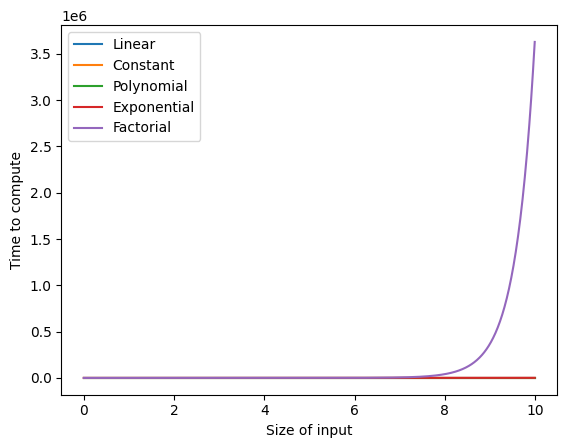

In [4]:
fig, ax = plt.subplots()
ax.plot(linear, label='Linear') 
ax.plot(const, label='Constant')
ax.set_xticklabels(np.arange(-2, 12, 2))
ax.set_xlabel('Size of input')
ax.set_ylabel('Time to compute')
ax.legend()
plt.show()

Check odd or even

Add two numbers

Square a number

/tmp/ipykernel_217953/1979576045.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-2, 12, 2))


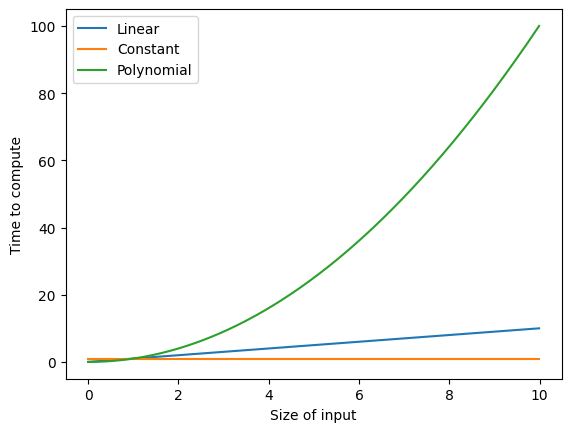

In [6]:
fig, ax = plt.subplots()
ax.plot(linear, label='Linear') 
ax.plot(const, label='Constant')
ax.plot(squares, label='Polynomial')
ax.set_xticklabels(np.arange(-2, 12, 2))
ax.set_xlabel('Size of input')
ax.set_ylabel('Time to compute')
ax.legend()
plt.show()

Check odd or even

Add two numbers

Square a number

Factorise a number

In [ ]:
fig, ax = plt.subplots()
ax.plot(linear, label='Linear') 
ax.plot(const, label='Constant')
ax.plot(squares, label='Polynomial')
ax.plot(expontential, label='Exponential')
ax.set_xticklabels(np.arange(-2, 12, 2))
ax.set_xlabel('Size of input')
ax.set_ylabel('Time to compute')
ax.legend()
plt.show()

Check odd or even

Add two numbers

Square a number

Factorise a number

Find the quickest route for a delivery truck

In [ ]:
fig, ax = plt.subplots()
ax.plot(linear, label='Linear') 
ax.plot(const, label='Constant')
ax.plot(squares, label='Polynomial')
ax.plot(expontential, label='Exponential')
ax.plot(factorial, label='Factorial')
ax.set_xticklabels(np.arange(-2, 12, 2))
ax.set_xlabel('Size of input')
ax.set_ylabel('Time to compute')
ax.legend()
plt.show()

## Set up

The first thing you'll need is an [imbq account](https://login.ibm.com/authsvc/mtfim/sps/authsvc?PolicyId=urn:ibm:security:authentication:asf:basicldapuser&Target=https%3A%2F%2Flogin.ibm.com%2Foidc%2Fendpoint%2Fdefault%2Fauthorize%3FqsId%3Da9df6944-2269-4eb6-a7c3-8ba972a737bd%26client_id%3DN2UwMWNkYmMtZjc3YS00) (its free!)



In [31]:
import numpy as np
from qiskit import *

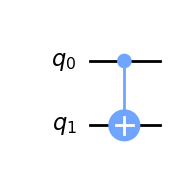

In [54]:
circ = QuantumCircuit(2)
circ.cx(0,1)
circ.draw('mpl')

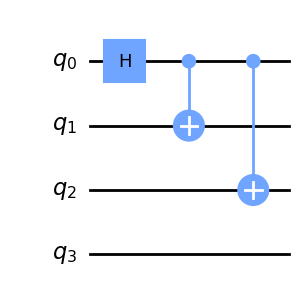

In [52]:
circ = QuantumCircuit(4)
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
circ.draw('mpl')

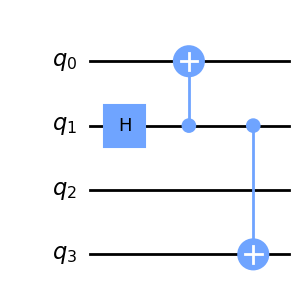

In [53]:
circ = QuantumCircuit(4)
circ.h(1)
circ.cx(1,0)
circ.cx(1,3)
circ.draw('mpl')

In [35]:
from qiskit import Aer

backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()

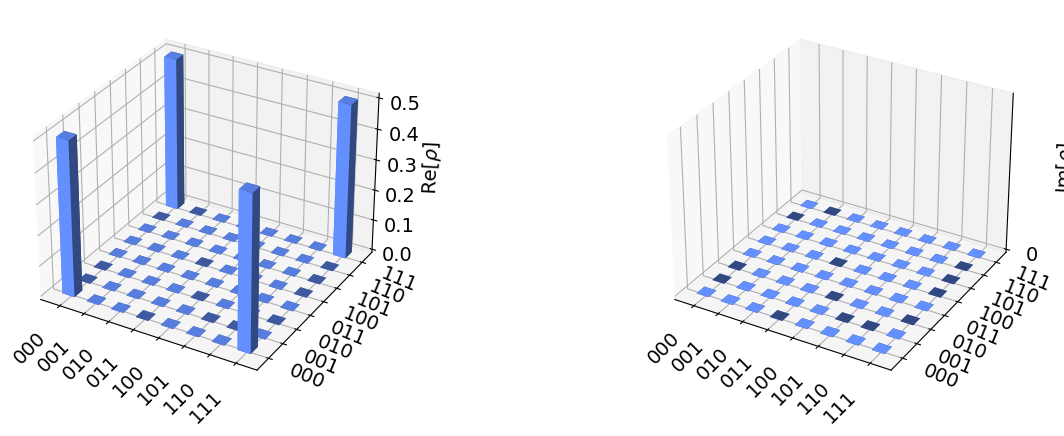

In [36]:
from qiskit.visualization import plot_state_city
outputstate = result.get_statevector(circ, decimals=2)
plot_state_city(outputstate)

In [37]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [38]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

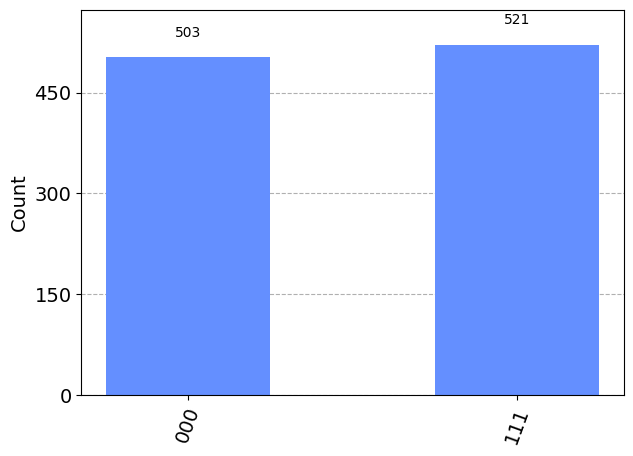

In [40]:
from qiskit.visualization import plot_histogram
counts = result_sim.get_counts(qc)
plot_histogram(counts)

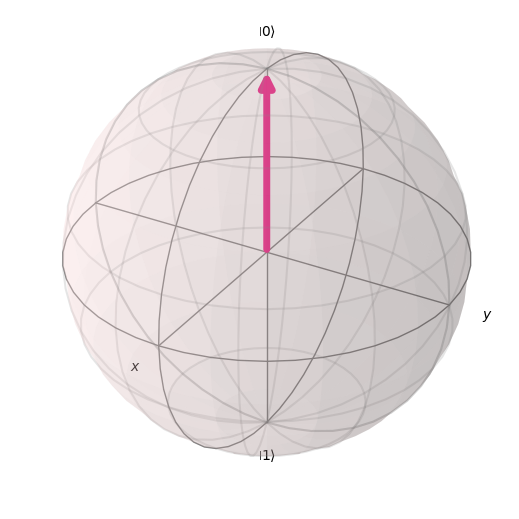

In [3]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1])

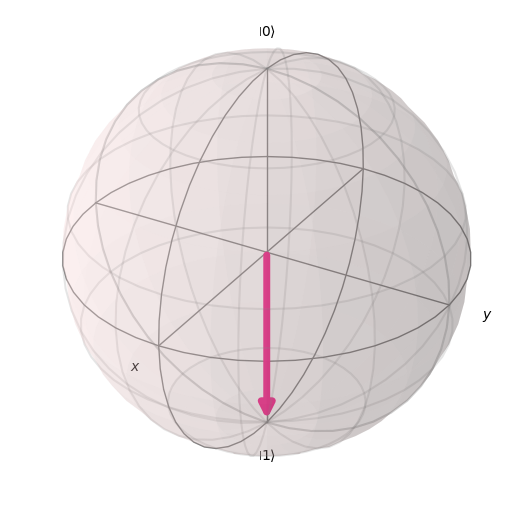

In [2]:
plot_bloch_vector([0,0,-1])


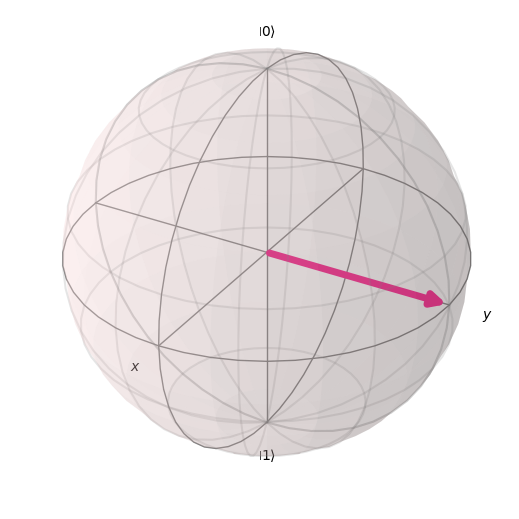

In [46]:
plot_bloch_vector([0,1,0])


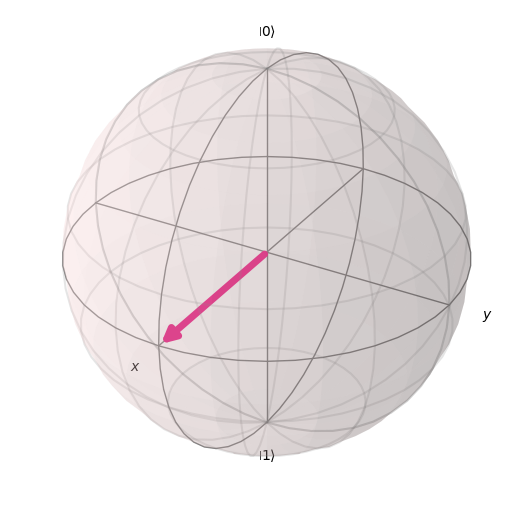

In [47]:
plot_bloch_vector([1,0,0])
